# Datasets combination and EDA

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats

%matplotlib inline

## Importing the datasets

In [3]:
df_drugs = pd.read_csv("../data/drug_consumption_original.csv")
df_wdi = pd.read_csv("../data/WDI_countries.csv")
df_violence = pd.read_csv("../data/violence_and_crime.csv")

In [4]:
df_drugs.head(30)

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,1,35 - 44,Female,Professional Certificate/ Diploma,UK,Mixed-White/Asian,39.0,36.0,42.0,37.0,...,Never Used,Never Used,Never Used,Never Used,Never Used,Never Used,Never Used,Used in Last Decade,Never Used,Never Used
1,2,25 - 34,Male,Doctorate Degree,UK,White,29.0,52.0,55.0,48.0,...,Used in Last Month,Never Used,Used in Last Decade,Never Used,Used in Last Decade,Used in Last Year,Never Used,Used in Last Month,Never Used,Never Used
2,3,35 - 44,Male,Professional Certificate/ Diploma,UK,White,31.0,45.0,40.0,32.0,...,Never Used,Never Used,Never Used,Never Used,Never Used,Never Used,Used over a Decade Ago,Never Used,Never Used,Never Used
3,4,18-24,Female,Masters Degree,UK,White,34.0,34.0,46.0,47.0,...,Never Used,Never Used,Used in Last Decade,Never Used,Never Used,Never Used,Never Used,Used in Last Decade,Never Used,Never Used
4,5,35 - 44,Female,Doctorate Degree,UK,White,43.0,28.0,43.0,41.0,...,Used over a Decade Ago,Never Used,Never Used,Used over a Decade Ago,Never Used,Never Used,Used in Last Decade,Used in Last Decade,Never Used,Never Used
5,6,65+,Female,Left School at 18 years,Canada,White,29.0,38.0,35.0,55.0,...,Never Used,Never Used,Never Used,Never Used,Never Used,Never Used,Never Used,Used in Last Day,Never Used,Never Used
6,7,45 - 54,Male,Masters Degree,USA,White,31.0,32.0,43.0,41.0,...,Never Used,Never Used,Never Used,Never Used,Never Used,Never Used,Never Used,Used in Last Day,Never Used,Never Used
7,8,35 - 44,Male,Left School at 16 years,UK,White,24.0,52.0,40.0,41.0,...,Never Used,Never Used,Never Used,Never Used,Never Used,Never Used,Never Used,Never Used,Never Used,Never Used
8,9,35 - 44,Female,Professional Certificate/ Diploma,Canada,White,42.0,55.0,39.0,48.0,...,Never Used,Never Used,Never Used,Never Used,Never Used,Never Used,Never Used,Used in Last Day,Never Used,Never Used
9,10,55 - 64,Male,Masters Degree,UK,White,33.0,40.0,36.0,47.0,...,Never Used,Never Used,Never Used,Never Used,Never Used,Never Used,Never Used,Used in Last Day,Never Used,Never Used


In [5]:
df_drugs.columns

Index(['ID', 'Age', 'Gender', 'Education', 'Country', 'Ethnicity', 'Nscore',
       'Escore', 'Oscore', 'Ascore', 'Cscore', 'Impulsive', 'SS', 'Alcohol',
       'Amphet', 'Amyl', 'Benzos', 'Caff', 'Cannabis', 'Choc', 'Coke', 'Crack',
       'Ecstasy', 'Heroin', 'Ketamine', 'Legalh', 'LSD', 'Meth', 'Mushrooms',
       'Nicotine', 'Semer', 'VSA'],
      dtype='object')

In [4]:
df_wdi.head(2)

,Country,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Australia,AUS,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,NaN,NaN
1,Australia,AUS,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.RU.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,NaN,NaN


In [5]:
df_violence.head(2)

,Iso3_code,Country,Region,Subregion,Indicator,Dimension,Category,Sex,Age,Year,Unit of measurement,VALUE,Source
0,CAN,Canada,Americas,Northern America,Violent offences,by type of offence,Serious assault,Total,Total,2003,Counts,48135.0,CTS
1,GBR_E_W,UK,Europe,Northern Europe,Violent offences,by type of offence,Serious assault,Total,Total,2003,Counts,455514.0,CTS


In [6]:
df_drugs.columns

Index(['ID', 'Age', 'Gender', 'Education', 'Country', 'Ethnicity', 'Nscore',
       'Escore', 'Oscore', 'Ascore', 'Cscore', 'Impulsive', 'SS', 'Alcohol',
       'Amphet', 'Amyl', 'Benzos', 'Caff', 'Cannabis', 'Choc', 'Coke', 'Crack',
       'Ecstasy', 'Heroin', 'Ketamine', 'Legalh', 'LSD', 'Meth', 'Mushrooms',
       'Nicotine', 'Semer', 'VSA'],
      dtype='object')

# df_drugs

**Demographic columns**:

- ID (CAN BE DELETED)
- Age (categories of age, catogorical ORDINAL -> transform to numerical with labels)
- Gender (catogorical NOMINAL -> Convert to 1, 0)
- Education (catogorical ORDINAL -> transform to numerical with labels)
- Country (catogorical NOMINAL -> Convert with One-Hot Encoding)  -> **For now, leave it like it is because "Country" is needed for merging the 3 datasets**
- Ethnicity (catogorical NOMINAL -> Convert with One-Hot Encoding) -> **DELETED (most of the people were white)**

**Psychological traits**:

All NUMERICAL -> normalize/standardize

- Nscore (neuroticism)
- Escore (extraversion)
- Oscore (openness to experience)
- Ascore (agreeableness)
- Cscore (conscientiousness)

- Impulsive

- SS (sensation seeking)

**List of Drugs**:

- Alcohol (CNS depressants)
- Amphet (CNS stimulants)
- Amyl (CNS depressants)
- Benzos (CNS depressants)
- Caff (CNS stimulants)
- Cannabis (Cannabis)
- Choc (TO BE DELETED)
- Coke (CNS stimulants)
- Crack (CNS stimulants)
- Ecstasy (CNS stimulants)
- Heroin (Opiodes, CNS depressants)
- Ketamine (CNS depressants)
- Legalh (CNS stimulants)
- LSD (Hallucinogens)
- Meth (CNS stimulants)
- Mushrooms (Hallucinogens)
- Nicotine
- Semer (fake to identify over-claimers!)(TO BE DELETED)
- VSA (CNS stimulants)

**I will convert the different drugs in 5 categories + Nicotine**


1) CNS depressants
2) CNS stimulants
3) Cannabis
4) Hallucinogens
5) Nicotine
6) Alcohol



**7 Classes of drug's usage for each individual**:

"Never Used", "Used over a Decade Ago", "Used in Last Decade", "Used in Last Year", "Used in Last Month", "Used in Last Week", and "Used in Last Day"

Categorical ORDINAL -> convert with labels

### Demographic columns

In [7]:
# First, checking the presence of Null values

df_drugs.isnull().any()

ID           False
Age          False
Gender       False
Education    False
Country      False
Ethnicity    False
Nscore       False
Escore       False
Oscore       False
Ascore       False
Cscore       False
Impulsive    False
SS           False
Alcohol      False
Amphet       False
Amyl         False
Benzos       False
Caff         False
Cannabis     False
Choc         False
Coke         False
Crack        False
Ecstasy      False
Heroin       False
Ketamine     False
Legalh       False
LSD          False
Meth         False
Mushrooms    False
Nicotine     False
Semer        False
VSA          False
dtype: bool

In [5]:
# Deleting ID column

df_drugs.drop("ID", axis = 1, inplace=True)

In [6]:
# Converting age categories (ordinal) to numerical (labels)

mapping_age = {"18-24" : 0,
               "25 - 34": 1,
               "35 - 44": 2,
               "45 - 54": 3,
               "55 - 64": 4,
               "65+": 5}

df_drugs["Age"] = df_drugs["Age"].map(mapping_age)

In [7]:
# Converting gender (nominal) to numerical (1 for female, -1 for male)

mapping_gender = {"Female" : 1,
                 "Male": -1}

df_drugs["Gender"] = df_drugs["Gender"].map(mapping_gender)

In [8]:
df_drugs["Education"].unique()

array(['Professional Certificate/ Diploma', 'Doctorate Degree',
       'Masters Degree', 'Left School at 18 years',
       'Left School at 16 years', 'University Degree',
       'Some College,No Certificate Or Degree',
       'Left School Before 16 years', 'Left School at 17 years'],
      dtype=object)

In [9]:
# Converting levels of education (ordinal) to numerical (labels)

# Since in the df_wdi I want to consider the unemployment rates based on the level of education, 
# I convert the values of df_drugs in order to be consistent with df_wdi.
# df_wdi -> unemployment with "basic education" (0), or "intermediate education" (1), or "advanced education" (2)

mapping_edu = {"Left School Before 16 years" : 0,
              "Left School at 16 years": 0,
              "Left School at 17 years": 0,
              "Left School at 18 years": 0,
              "Professional Certificate/ Diploma": 1,
              "Some College,No Certificate Or Degree": 1,
              "University Degree": 2,
              "Masters Degree": 2,
              "Doctorate Degree": 2}

df_drugs["Education"] = df_drugs["Education"].map(mapping_edu)

In [10]:
# Converting "Ethnicity" values with One-Hot Encoding

ethnicity_dummies = pd.get_dummies(df_drugs["Ethnicity"])
df_drugs = pd.concat([df_drugs, ethnicity_dummies], axis=1)

# Drop the original 'Ethnicity' column 
df_drugs = df_drugs.drop("Ethnicity", axis=1)

df_drugs.head()

,Age,Gender,Education,Country,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,...,Nicotine,Semer,VSA,Asian,Black,Mixed-Black/Asian,Mixed-White/Asian,Mixed-White/Black,Other,White
0,2,1,1,UK,39.0,36.0,42.0,37.0,-0.00665,-0.21712,...,Used in Last Decade,Never Used,Never Used,False,False,False,True,False,False,False
1,1,-1,2,UK,29.0,52.0,55.0,48.0,-0.14277,-0.71126,...,Used in Last Month,Never Used,Never Used,False,False,False,False,False,False,True
2,2,-1,1,UK,31.0,45.0,40.0,32.0,-1.01450,-1.37983,...,Never Used,Never Used,Never Used,False,False,False,False,False,False,True
3,0,1,2,UK,34.0,34.0,46.0,47.0,0.58489,-1.37983,...,Used in Last Decade,Never Used,Never Used,False,False,False,False,False,False,True
4,2,1,2,UK,43.0,28.0,43.0,41.0,1.30612,-0.21712,...,Used in Last Decade,Never Used,Never Used,False,False,False,False,False,False,True


In [11]:
# Now converting the dummies columns as 0 and 1 (the values were originally strings so the get_dummies converted them to booleans)

df_drugs[ethnicity_dummies.columns] = df_drugs[ethnicity_dummies.columns].replace({True: 1, False: 0})

C:\Users\laura\AppData\Local\Temp\ipykernel_18408\399563074.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_drugs[ethnicity_dummies.columns] = df_drugs[ethnicity_dummies.columns].replace({True: 1, False: 0})


In [12]:
# value counts for demographic columns

demo_columns = ["Age", "Gender", "Education", "Asian", "Black", "Mixed-Black/Asian", 
                "Mixed-White/Asian", "Mixed-White/Black","Other", "White"]

for col in demo_columns:
    print(df_drugs[col].value_counts())

Age
0    643
1    481
2    356
3    294
4     93
5     18
Name: count, dtype: int64
Gender
-1    943
 1    942
Name: count, dtype: int64
Education
2    852
1    776
0    257
Name: count, dtype: int64
Asian
0    1859
1      26
Name: count, dtype: int64
Black
0    1852
1      33
Name: count, dtype: int64
Mixed-Black/Asian
0    1882
1       3
Name: count, dtype: int64
Mixed-White/Asian
0    1865
1      20
Name: count, dtype: int64
Mixed-White/Black
0    1865
1      20
Name: count, dtype: int64
Other
0    1822
1      63
Name: count, dtype: int64
White
1    1720
0     165
Name: count, dtype: int64


**The ethnicity is not equal, the individuals are almost all white, so I will not consider the facot "Ethnicity" anymore.**

In [13]:
df_drugs.drop(columns = ["Asian", "Black", "Mixed-Black/Asian", "Mixed-White/Asian", "Mixed-White/Black","Other", "White"],
             axis = 1, inplace = True)

### Psychological traits

array([[<Axes: title={'center': 'Nscore'}>,
        <Axes: title={'center': 'Escore'}>,
        <Axes: title={'center': 'Oscore'}>],
       [<Axes: title={'center': 'Ascore'}>,
        <Axes: title={'center': 'Cscore'}>,
        <Axes: title={'center': 'Impulsive'}>],
       [<Axes: title={'center': 'SS'}>, <Axes: >, <Axes: >]], dtype=object)

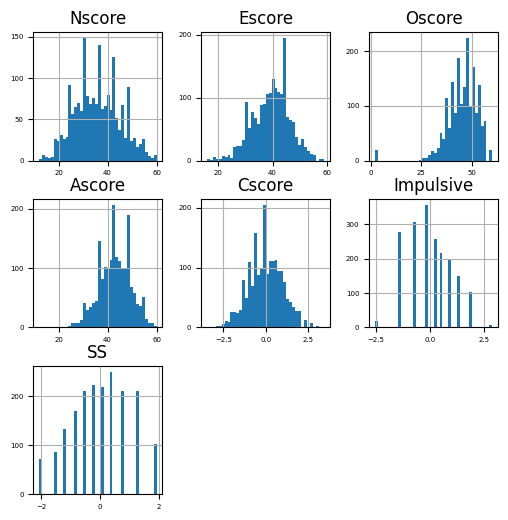

In [14]:
score_colums = ["Nscore", "Escore", "Oscore", "Ascore", "Cscore", "Impulsive", "SS"]

df_drugs[score_colums].hist(figsize = (6,6), bins = 40, xlabelsize = 5, ylabelsize = 5)

In [15]:
# Check for normality distribution

standardized_Nscore = (df_drugs["Nscore"] - df_drugs["Nscore"].mean()) / df_drugs["Nscore"].std(ddof=1)
ks_statistic_nscore, ks_p_value_nscore = stats.kstest(standardized_Nscore, 'norm')

standardized_Escore = (df_drugs["Escore"] - df_drugs["Escore"].mean()) / df_drugs["Escore"].std(ddof=1)
ks_statistic_escore, ks_p_value_escore = stats.kstest(standardized_Escore, 'norm')

standardized_Oscore = (df_drugs["Oscore"] - df_drugs["Oscore"].mean()) / df_drugs["Oscore"].std(ddof=1)
ks_statistic_oscore, ks_p_value_oscore = stats.kstest(standardized_Oscore, 'norm')

standardized_Ascore = (df_drugs["Ascore"] - df_drugs["Ascore"].mean()) / df_drugs["Ascore"].std(ddof=1)
ks_statistic_ascore, ks_p_value_ascore = stats.kstest(standardized_Ascore, 'norm')

standardized_Cscore = (df_drugs["Cscore"] - df_drugs["Cscore"].mean()) / df_drugs["Cscore"].std(ddof=1)
ks_statistic_cscore, ks_p_value_cscore = stats.kstest(standardized_Cscore, 'norm')

standardized_imp = (df_drugs["Impulsive"] - df_drugs["Impulsive"].mean()) / df_drugs["Impulsive"].std(ddof=1)
ks_statistic_imp, ks_p_value_imp = stats.kstest(standardized_imp, 'norm')

standardized_ss = (df_drugs["SS"] - df_drugs["SS"].mean()) / df_drugs["SS"].std(ddof=1)
ks_statistic_ss, ks_p_value_ss = stats.kstest(standardized_ss, 'norm')



print(f""" 
Nscore:
ks_statistic: {ks_statistic_nscore},
p_value: {ks_p_value_nscore};

Escore:
ks_statistic: {ks_statistic_escore},
p_value: {ks_p_value_escore};

Oscore:
ks_statistic: {ks_statistic_oscore},
p_value: {ks_p_value_oscore};

Ascore:
ks_statistic: {ks_statistic_ascore},
p_value: {ks_p_value_ascore};

Cscore:
ks_statistic: {ks_statistic_cscore},
p_value: {ks_p_value_cscore};

Impulsive:
ks_statistic: {ks_statistic_imp},
p_value: {ks_p_value_imp};

SS:
ks_statistic: {ks_statistic_ss},
p_value: {ks_p_value_ss}""")

 
Nscore:
ks_statistic: 0.050741290287688534,
p_value: 0.0001171963947480781;

Escore:
ks_statistic: 0.05803950854098561,
p_value: 5.826043003108814e-06;

Oscore:
ks_statistic: 0.08017580686711878,
p_value: 5.484869610446238e-11;

Ascore:
ks_statistic: 0.048933529679471954,
p_value: 0.00023160653738502922;

Cscore:
ks_statistic: 0.03059116294977282,
p_value: 0.05751947239637445;

Impulsive:
ks_statistic: 0.1011363166604235,
p_value: 3.077887745569e-17;

SS:
ks_statistic: 0.07284335992901148,
p_value: 3.827750825984927e-09


- Nscore and Ascore data are non-normally distributed. However, since I want to use multi-label classification model (like Neural Networks), I won't transform the data for now. Neural Network model is know to handle non-normally distributed data so this may not impact the accuracy of the model.

### List of Drugs and classes of drug's usage (values)

In [16]:
# Dropping columns "Choc" and "Semer"

df_drugs.drop(columns = ["Choc", "Semer"], axis = 1, inplace = True)

In [17]:
df_drugs.drop("Caff", axis = 1, inplace = True)

In [18]:
# Simplifying all drugs by subdividing the, on 5 categories. 
# The value will be the last time they used a drug that is included in that category.

# First, rename the column labels with the name of the specific category

map_drugs = {"Alcohol": "Alcohol_",
             "Amphet": "CNS_stimulants",
             "Amyl": "CNS_depressants",
             "Benzos": "CNS_depressants",
             "Cannabis": "Cannabis_",
             "Coke": "CNS_stimulants",
             "Crack": "CNS_stimulants",
             "Ecstasy": "CNS_stimulants",
             "Heroin": "CNS_depressants",
             "Ketamine": "CNS_depressants",
             "Legalh": "CNS_stimulants",
             "LSD": "Hallucinogens",
             "Meth": "CNS_stimulants",
             "Mushrooms": "Hallucinogens",
             "Nicotine": "Nicotine_",
             "VSA": "CNS_stimulants"}

columns_to_rename = ['Alcohol', 'Amphet', 'Amyl','Benzos', 'Cannabis', 
                 'Coke', 'Crack', 'Ecstasy', 'Heroin','Ketamine', 'Legalh', 
                 'LSD', 'Meth', 'Mushrooms', 'Nicotine', 'VSA']


# Create a subset of the DataFrame containing only the columns to rename
df_drugs_subset = df_drugs[columns_to_rename]

# Rename the columns in the subset
df_drugs_subset = df_drugs_subset.rename(columns=map_drugs)

# Merge the renamed subset back with the original DataFrame
df_drugs_new = pd.concat([df_drugs.drop(columns=columns_to_rename), df_drugs_subset], axis=1)

In [19]:
# Categorizing/Simplifying drugs categories 

new_columns = ["Alcohol_", "CNS_depressants", "CNS_stimulants", "Cannabis_", "Nicotine_", "Hallucinogens"]

#Definin the priority list of the values

class_priority = [
    "Used in Last Day",
    "Used in Last Week",
    "Used in Last Month",
    "Used in Last Year",
    "Used in Last Decade",
    "Used over a Decade Ago",
    "Never Used"
]

def prioritize_values(series):
    # Sort the values based on the class_priority list
    sorted_values = sorted(series, key=lambda x: class_priority.index(x) if x in class_priority else float('inf'))
    return sorted_values[0]

def drugs_cat(df, column_name):
    
    specific_column = [col for col in df.columns if col.startswith(column_name)]
    merged_column = df[specific_column].apply(prioritize_values, axis=1)
    df.drop(columns=specific_column, inplace=True)
    
    df[column_name] = merged_column
    
    return df

# Applying the drugs_cat function for all the new columns of drugs categories

for column in new_columns:
    df_drugs_new = drugs_cat(df_drugs_new, column)
    
df_drugs_new.rename(columns={"Alcohol_": "Alcohol", "Cannabis_": "Cannabis", "Nicotine_": "Nicotine"}, inplace=True)

In [20]:
drugs_columns = ["Alcohol", "CNS_depressants", "CNS_stimulants", "Cannabis", "Nicotine", "Hallucinogens"]

df_drugs_new[drugs_columns].head()

,Alcohol,CNS_depressants,CNS_stimulants,Cannabis,Nicotine,Hallucinogens
0,Used in Last Week,Used in Last Decade,Used in Last Decade,Never Used,Used in Last Decade,Never Used
1,Used in Last Week,Used in Last Decade,Used in Last Month,Used in Last Month,Used in Last Month,Used in Last Decade
2,Used in Last Day,Never Used,Never Used,Used in Last Year,Never Used,Used over a Decade Ago
3,Used in Last Month,Used in Last Year,Used in Last Decade,Used in Last Decade,Used in Last Decade,Never Used
4,Used in Last Month,Used over a Decade Ago,Used over a Decade Ago,Used in Last Year,Used in Last Decade,Used in Last Decade


In [21]:
# Converting the ORDINAL classes values to numerical

mapping_classes = {"Never Used": 0,
                   "Used over a Decade Ago": 1,
                   "Used in Last Decade": 2,
                   "Used in Last Year": 3,
                   "Used in Last Month": 4,
                   "Used in Last Week": 5,
                   "Used in Last Day": 6}

for col in drugs_columns:
    df_drugs_new[col] = df_drugs_new[col].map(mapping_classes)

In [22]:
df_drugs_new[drugs_columns].head()

,Alcohol,CNS_depressants,CNS_stimulants,Cannabis,Nicotine,Hallucinogens
0,5,2,2,0,2,0
1,5,2,4,4,4,2
2,6,0,0,3,0,1
3,4,3,2,2,2,0
4,4,1,1,3,2,2


In [23]:
df_drugs_new.dtypes # all converted to numerical (not the Country, needed for merging the datasets)

Age                  int64
Gender               int64
Education            int64
Country             object
Nscore             float64
Escore             float64
Oscore             float64
Ascore             float64
Cscore             float64
Impulsive          float64
SS                 float64
Alcohol              int64
CNS_depressants      int64
CNS_stimulants       int64
Cannabis             int64
Nicotine             int64
Hallucinogens        int64
dtype: object

In [24]:
df_drugs_new = df_drugs_new[df_drugs_new["Country"] != "Other"]

In [25]:
df_drugs_new["Country"].value_counts()

Country
UK             1044
USA             557
Canada           87
Australia        54
Ireland          20
New Zealand       5
Name: count, dtype: int64

In [26]:
# Dropping also New Zealand, too few data and no data for some of the features in the other datasets

df_drugs_new = df_drugs_new[df_drugs_new["Country"] != "New Zealand"]

In [27]:
# Saving the df_drugs_new

df_drugs_new.to_csv("../data/df_drugs_cleaned.csv", index = False)

# df_wdi

Features that I will extract from this dataset:

1) GDP
2) Unemployment (subdivided by education level and gender)
3) Poverty rate (Proportion of people living below 50 percent of median income (%))
4) Political Stability and Absence of Violence/Terrorism

For the last 10 years from 2018, the year that the survay about drug consumption was taken.

In [28]:
df_wd = df_wdi.copy()

In [29]:
df_wd.head()

,Country,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Australia,AUS,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,NaN,NaN
1,Australia,AUS,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.RU.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,NaN,NaN
2,Australia,AUS,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.UR.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,NaN,NaN
3,Australia,AUS,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,NaN,NaN
4,Australia,AUS,"Access to electricity, rural (% of rural popul...",EG.ELC.ACCS.RU.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,NaN,NaN


In [30]:
# Dropping New Zealand as it has too few data

df_wd = df_wd[df_wd["Country"] != "New Zealand"]

In [31]:
# Considering only data from the last 10 years from 2018 (survey date)

df_wd.drop(columns = ['Country Code','Indicator Code', '1960',
       '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968', '1969',
       '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978',
       '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
       '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2019', '2020', '2021', '2022', '2023'], axis=1, inplace=True)

In [32]:
df_wd.isnull().sum()

Country              0
Indicator Name       0
2008              2804
2009              2861
2010              2633
2011              2749
2012              2788
2013              2773
2014              2572
2015              2597
2016              2625
2017              2707
2018              2807
dtype: int64

In [33]:
df_wd["Indicator Name"].unique()

array(['Access to clean fuels and technologies for cooking (% of population)',
       'Access to clean fuels and technologies for cooking, rural (% of rural population)',
       'Access to clean fuels and technologies for cooking, urban (% of urban population)',
       ...,
       'Women who were first married by age 18 (% of women ages 20-24)',
       "Women's share of population ages 15+ living with HIV (%)",
       'Young people (ages 15-24) newly infected with HIV'], dtype=object)

In [34]:
# GDP

gdp = df_wd[df_wd["Indicator Name"] == "GDP per capita, PPP (current international $)"]
gdp

,Country,Indicator Name,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
485,Australia,"GDP per capita, PPP (current international $)",37532.999043,40312.395119,39374.632104,42025.464582,42866.604330,45936.049310,46914.386708,46292.095439,47289.285914,48418.558422,50251.335338
1977,Canada,"GDP per capita, PPP (current international $)",40376.306880,38865.413458,40099.448239,41666.707627,42290.965410,44298.578734,45753.750555,44670.080539,46472.340249,48317.174584,49992.762276
3469,Ireland,"GDP per capita, PPP (current international $)",44169.094341,41469.837656,43202.955694,45116.988408,46283.728966,47797.149673,51238.800329,69214.421999,71410.369271,78168.967738,84918.338381
6453,UK,"GDP per capita, PPP (current international $)",36744.791358,35023.332311,36487.671853,37224.378765,38343.086903,39954.219145,41278.127508,42496.854291,44082.116468,46048.200051,47090.484897
7945,USA,"GDP per capita, PPP (current international $)",48570.045980,47194.943355,48650.643128,50065.966504,51784.418574,53291.127689,55123.849787,56762.729452,57866.744934,59907.754261,62823.309438


In [35]:
# Unemployment

unemployment = df_wd[df_wd["Indicator Name"].str.contains("Unemployment")]
unemployment["Indicator Name"].unique()

array(['Unemployment with advanced education (% of total labor force with advanced education)',
       'Unemployment with advanced education, female (% of female labor force with advanced education)',
       'Unemployment with advanced education, male (% of male labor force with advanced education)',
       'Unemployment with basic education (% of total labor force with basic education)',
       'Unemployment with basic education, female (% of female labor force with basic education)',
       'Unemployment with basic education, male (% of male labor force with basic education)',
       'Unemployment with intermediate education (% of total labor force with intermediate education)',
       'Unemployment with intermediate education, female (% of female labor force with intermediate education)',
       'Unemployment with intermediate education, male (% of male labor force with intermediate education)',
       'Unemployment, female (% of female labor force) (modeled ILO estimate)',
       '

In [36]:
exclude_list_unempl = ['Unemployment with advanced education (% of total labor force with advanced education)',
                       'Unemployment with basic education (% of total labor force with basic education)',
                       'Unemployment with intermediate education (% of total labor force with intermediate education)',
                       'Unemployment, female (% of female labor force) (modeled ILO estimate)',
                       'Unemployment, female (% of female labor force) (national estimate)',
                       'Unemployment, male (% of male labor force) (modeled ILO estimate)',
                       'Unemployment, male (% of male labor force) (national estimate)',
                       'Unemployment, youth female (% of female labor force ages 15-24) (modeled ILO estimate)',
                       'Unemployment, youth female (% of female labor force ages 15-24) (national estimate)',
                       'Unemployment, youth male (% of male labor force ages 15-24) (modeled ILO estimate)',
                       'Unemployment, youth male (% of male labor force ages 15-24) (national estimate)',
                       'Unemployment, youth total (% of total labor force ages 15-24) (modeled ILO estimate)',
                       'Unemployment, youth total (% of total labor force ages 15-24) (national estimate)',
                      'Unemployment, total (% of total labor force) (modeled ILO estimate)']

unemployment = unemployment[~unemployment["Indicator Name"].isin(exclude_list_unempl)]

unemployment["Indicator Name"].unique()

array(['Unemployment with advanced education, female (% of female labor force with advanced education)',
       'Unemployment with advanced education, male (% of male labor force with advanced education)',
       'Unemployment with basic education, female (% of female labor force with basic education)',
       'Unemployment with basic education, male (% of male labor force with basic education)',
       'Unemployment with intermediate education, female (% of female labor force with intermediate education)',
       'Unemployment with intermediate education, male (% of male labor force with intermediate education)',
       'Unemployment, total (% of total labor force) (national estimate)'],
      dtype=object)

In [37]:
unemployment.isnull().any()

Country           False
Indicator Name    False
2008              False
2009              False
2010              False
2011              False
2012              False
2013              False
2014              False
2015              False
2016              False
2017              False
2018              False
dtype: bool

In [38]:
unemployment_adv_edu_f = unemployment[unemployment["Indicator Name"].str.contains("advanced education, female")]
unemployment_adv_edu_m = unemployment[unemployment["Indicator Name"].str.contains("advanced education, male")]
unemployment_bas_edu_f = unemployment[unemployment["Indicator Name"].str.contains("basic education, female")]
unemployment_bas_edu_m = unemployment[unemployment["Indicator Name"].str.contains("basic education, male")]
unemployment_int_edu_f = unemployment[unemployment["Indicator Name"].str.contains("intermediate education, female")]
unemployment_int_edu_m = unemployment[unemployment["Indicator Name"].str.contains("intermediate education, male")]
unemployment_tot = unemployment[unemployment["Indicator Name"].str.contains("Unemployment, total")]

In [39]:
# Poverty rate 

poverty = df_wd[df_wd["Indicator Name"].str.contains("Proportion of people living below 50 percent")]
poverty

,Country,Indicator Name,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
1166,Australia,Proportion of people living below 50 percent o...,10.3,NaN,10.3,NaN,NaN,NaN,10.0,NaN,10.7,NaN,11.7
2658,Canada,Proportion of people living below 50 percent o...,13.5,13.2,13.2,12.2,14.2,14.7,13.7,13.7,12.7,13.2,12.2
4150,Ireland,Proportion of people living below 50 percent o...,8.8,10.3,10.6,11.5,11.0,11.4,9.4,9.8,8.8,8.4,7.1
7134,UK,Proportion of people living below 50 percent o...,12.7,12.0,11.2,11.5,11.2,11.2,12.0,12.0,12.2,12.5,12.2
8626,USA,Proportion of people living below 50 percent o...,18.2,17.5,18.0,18.0,18.2,18.0,17.0,17.2,18.0,18.2,18.2


In [40]:
# Replacing NaN values in poverty rate of Australia with the mean value

poverty_new = poverty.drop("Indicator Name", axis=True).set_index("Country")
mean_australia = poverty_new.loc["Australia"].mean()
mean_canada = poverty_new.loc["Canada"].mean()
mean_ireland = poverty_new.loc["Ireland"].mean()
mean_australia = poverty_new.loc["Australia"].mean()


In [41]:
poverty

,Country,Indicator Name,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
1166,Australia,Proportion of people living below 50 percent o...,10.3,NaN,10.3,NaN,NaN,NaN,10.0,NaN,10.7,NaN,11.7
2658,Canada,Proportion of people living below 50 percent o...,13.5,13.2,13.2,12.2,14.2,14.7,13.7,13.7,12.7,13.2,12.2
4150,Ireland,Proportion of people living below 50 percent o...,8.8,10.3,10.6,11.5,11.0,11.4,9.4,9.8,8.8,8.4,7.1
7134,UK,Proportion of people living below 50 percent o...,12.7,12.0,11.2,11.5,11.2,11.2,12.0,12.0,12.2,12.5,12.2
8626,USA,Proportion of people living below 50 percent o...,18.2,17.5,18.0,18.0,18.2,18.0,17.0,17.2,18.0,18.2,18.2


In [42]:
# Political Stability and Absence of Violence/Terrorism
# Estimate = score [-2.5, 2.5] https://databank.worldbank.org/metadataglossary/worldwide-governance-indicators/series/PV.EST

politics = df_wd[df_wd["Indicator Name"].str.contains("Political Stability and Absence of Violence/Terrorism: Estimate")]
politics

,Country,Indicator Name,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
1014,Australia,Political Stability and Absence of Violence/Te...,0.954700,0.855121,0.888860,0.935710,0.997997,1.031073,1.032192,0.873181,1.033424,0.876147,0.970812
2506,Canada,Political Stability and Absence of Violence/Te...,1.041373,1.127076,0.936318,1.077176,1.113016,1.061422,1.175504,1.262337,1.240412,1.089680,0.963774
3998,Ireland,Political Stability and Absence of Violence/Te...,1.186874,1.057366,1.020165,0.948999,0.941073,0.901076,1.052991,0.895333,0.833850,0.993409,1.011168
6982,UK,Political Stability and Absence of Violence/Te...,0.492880,0.121950,0.411818,0.351708,0.402271,0.486201,0.415348,0.503706,0.347933,0.380708,0.077565
8474,USA,Political Stability and Absence of Violence/Te...,0.582660,0.447314,0.438404,0.591247,0.632442,0.643073,0.582420,0.662890,0.385635,0.262202,0.386043


In [43]:
# Concatenating the four dataframes relative to the 4 indicators

df_wdi_new = pd.concat([gdp, unemployment, poverty, politics], axis=0)
df_wdi_new.head()

,Country,Indicator Name,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
485,Australia,"GDP per capita, PPP (current international $)",37532.999043,40312.395119,39374.632104,42025.464582,42866.604330,45936.049310,46914.386708,46292.095439,47289.285914,48418.558422,50251.335338
1977,Canada,"GDP per capita, PPP (current international $)",40376.306880,38865.413458,40099.448239,41666.707627,42290.965410,44298.578734,45753.750555,44670.080539,46472.340249,48317.174584,49992.762276
3469,Ireland,"GDP per capita, PPP (current international $)",44169.094341,41469.837656,43202.955694,45116.988408,46283.728966,47797.149673,51238.800329,69214.421999,71410.369271,78168.967738,84918.338381
6453,UK,"GDP per capita, PPP (current international $)",36744.791358,35023.332311,36487.671853,37224.378765,38343.086903,39954.219145,41278.127508,42496.854291,44082.116468,46048.200051,47090.484897
7945,USA,"GDP per capita, PPP (current international $)",48570.045980,47194.943355,48650.643128,50065.966504,51784.418574,53291.127689,55123.849787,56762.729452,57866.744934,59907.754261,62823.309438


In [44]:
# Taking the mean values of the last 10 years for each indicator and country

def calculate_country_mean(df, country):
    df_country = df.drop("Indicator Name", axis=1).set_index("Country")
    mean_value = df_country.loc[country].mean()
    
    return mean_value


dataframes = [gdp, unemployment_adv_edu_f, unemployment_adv_edu_m, unemployment_bas_edu_f, unemployment_bas_edu_m,
              unemployment_int_edu_f, unemployment_int_edu_m, unemployment_tot, poverty, politics]

countries = ["Australia", "Canada", "UK", "USA", "Ireland"]

dataframe_names = ["GDP", "unemployment_adv_edu_f", "unemployment_adv_edu_m", "unemployment_bas_edu_f", 
                   "unemployment_bas_edu_m", "unemployment_int_edu_f", "unemployment_int_edu_m",
                   "unemployment_tot", "Poverty", "Politics"]

means = {}
for country in countries:
    means[country] = {}
    for i, df in enumerate(dataframes):
        means[country][dataframe_names[i]] = calculate_country_mean(df, country)
        
means

{'Australia': {'GDP': 44292.16420986309,
  'unemployment_adv_edu_f': 3.288272727272727,
  'unemployment_adv_edu_m': 3.1205454545454545,
  'unemployment_bas_edu_f': 9.373909090909091,
  'unemployment_bas_edu_m': 9.959909090909091,
  'unemployment_int_edu_f': 5.990454545454545,
  'unemployment_int_edu_m': 4.915909090909091,
  'unemployment_tot': 5.429818181818181,
  'Poverty': 10.6,
  'Politics': 0.9499287876215855},
 'Canada': {'GDP': 43891.22986815611,
  'unemployment_adv_edu_f': 5.076545454545454,
  'unemployment_adv_edu_m': 5.757363636363636,
  'unemployment_bas_edu_f': 13.938727272727276,
  'unemployment_bas_edu_m': 14.43827272727273,
  'unemployment_int_edu_f': 7.442909090909091,
  'unemployment_int_edu_m': 8.676636363636364,
  'unemployment_tot': 7.123909090909091,
  'Poverty': 13.318181818181815,
  'Politics': 1.098916985771873},
 'UK': {'GDP': 40433.9330499364,
  'unemployment_adv_edu_f': 3.3153636363636365,
  'unemployment_adv_edu_m': 3.527909090909091,
  'unemployment_bas_edu_

In [45]:
df_wdi_means = pd.DataFrame(means)
df_wdi_means

,Australia,Canada,UK,USA,Ireland
GDP,44292.164210,43891.229868,40433.933050,53821.957555,56635.513860
unemployment_adv_edu_f,3.288273,5.076545,3.315364,3.926545,6.216636
unemployment_adv_edu_m,3.120545,5.757364,3.527909,3.852182,6.141818
unemployment_bas_edu_f,9.373909,13.938727,9.912545,11.944182,15.342636
unemployment_bas_edu_m,9.959909,14.438273,11.742455,9.562727,18.537545
unemployment_int_edu_f,5.990455,7.442909,6.503273,8.231545,11.881091
unemployment_int_edu_m,4.915909,8.676636,6.948545,9.088545,14.414000
unemployment_tot,5.429818,7.123909,6.266727,6.693818,11.004636
Poverty,10.600000,13.318182,11.881818,17.863636,9.736364
Politics,0.949929,1.098917,0.362917,0.510394,0.985664


In [46]:
df = df_wdi_means.reset_index()

# Melt the DataFrame to reshape it
df_melted = df.melt(id_vars='index', var_name='Country', value_name='Value')

# Sort by Country
df_melted = df_melted.sort_values(by='Country').reset_index(drop=True)
df_melted.head()

,index,Country,Value
0,GDP,Australia,44292.164210
1,unemployment_adv_edu_f,Australia,3.288273
2,unemployment_adv_edu_m,Australia,3.120545
3,unemployment_bas_edu_f,Australia,9.373909
4,unemployment_bas_edu_m,Australia,9.959909


In [47]:
df_wdi_final = df_melted.pivot_table(index='Country', columns='index', values='Value')

# Reset index to make 'Country' a column
df_wdi_final.reset_index(inplace=True)

# Rename the index to None
df_wdi_final.rename_axis(None, axis=1, inplace=True)

df_wdi_final

,Country,GDP,Politics,Poverty,unemployment_adv_edu_f,unemployment_adv_edu_m,unemployment_bas_edu_f,unemployment_bas_edu_m,unemployment_int_edu_f,unemployment_int_edu_m,unemployment_tot
0,Australia,44292.164210,0.949929,10.600000,3.288273,3.120545,9.373909,9.959909,5.990455,4.915909,5.429818
1,Canada,43891.229868,1.098917,13.318182,5.076545,5.757364,13.938727,14.438273,7.442909,8.676636,7.123909
2,Ireland,56635.513860,0.985664,9.736364,6.216636,6.141818,15.342636,18.537545,11.881091,14.414000,11.004636
3,UK,40433.933050,0.362917,11.881818,3.315364,3.527909,9.912545,11.742455,6.503273,6.948545,6.266727
4,USA,53821.957555,0.510394,17.863636,3.926545,3.852182,11.944182,9.562727,8.231545,9.088545,6.693818


In [48]:
# Saving the df_wdi_final

df_wdi_final.to_csv("../data/df_wdi_cleaned.csv", index = False)

In [49]:
df_wdi_final.columns

Index(['Country', 'GDP', 'Politics', 'Poverty', 'unemployment_adv_edu_f',
       'unemployment_adv_edu_m', 'unemployment_bas_edu_f',
       'unemployment_bas_edu_m', 'unemployment_int_edu_f',
       'unemployment_int_edu_m', 'unemployment_tot'],
      dtype='object')

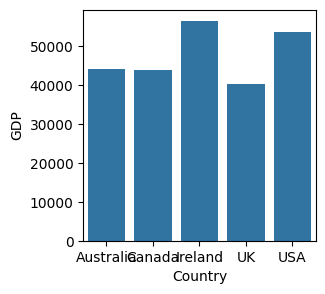

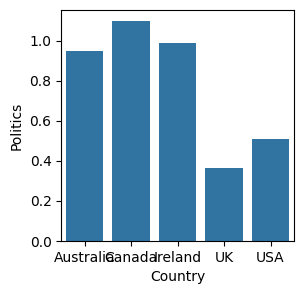

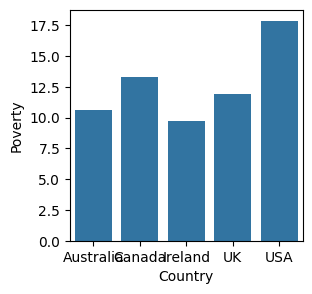

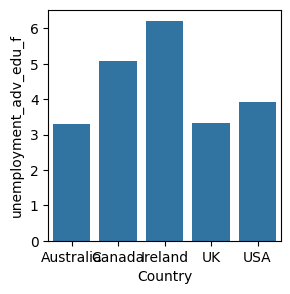

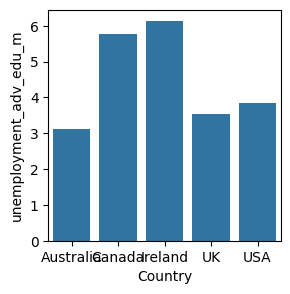

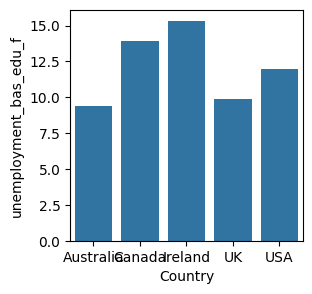

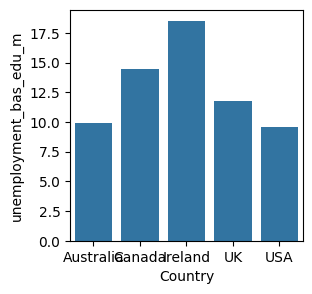

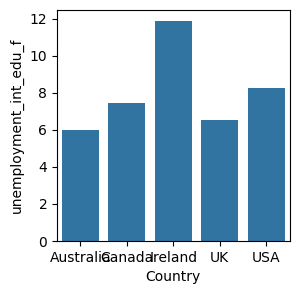

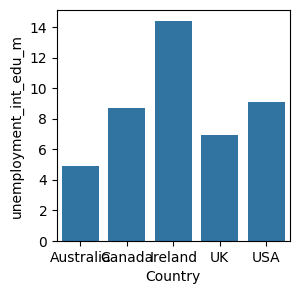

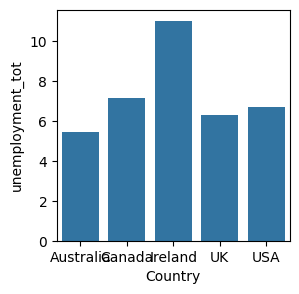

In [50]:
numerical_col = ['GDP', 'Politics', 'Poverty', 'unemployment_adv_edu_f',
                 'unemployment_adv_edu_m', 'unemployment_bas_edu_f',
                 'unemployment_bas_edu_m', 'unemployment_int_edu_f',
                 'unemployment_int_edu_m', 'unemployment_tot']

for col in numerical_col:
    plt.figure(figsize=(3,3))
    sns.barplot(data=df_wdi_final, x = "Country", y = col)
    plt.show()

### df_wdi_final

This dataframe containes different features for every considered country. Every value is the mean value of the last 10 years from 2018.

- **GDP** = GDP per capita, PPP (current international $) ->  values in dollars ($). It provides per capita values for gross domestic product (GDP) expressed in current international dollars converted by purchasing power parity (PPP) conversion factor. GDP is the sum of gross value added by all resident producers in the country plus any product taxes and minus any subsidies not included in the value of the products.

- **Politics** = Political Stability and Absence of Violence/Terrorism. It measures the perceptions of the *likelihood of political instability* and/or politically-motivated violence, including terrorism. I considered the Estimate value that is a score [-2.5, 2.5] in units of a normal distribution. https://databank.worldbank.org/metadataglossary/worldwide-governance-indicators/series/PV.EST

- **Poverty** = Proportion of people living below 50 percent of median income (%). 

- **unemployment_adv_edu** = unemployent of people with advanced education (%).

- **unemployment_bas_edu** = unemployent of people with basic education (%).

- **unemployment_int_edu** = unemployent of people with intermediate education (%).

- **unemployment_female** = unemployent of females (%).

- **unemployment_male** = unemployent of males (%).

- **unemployment_tot** = total unemployent (%).


**Insights from EDA**:

- The country with the highest GDP is USA

- The likelihood of political instability is higher in Australia, Canada, and Ireland compared to UK and USA

- However, the proportion of people living below 50 percent of median income is higher in USA, the other countries values are comparable.

- Unemployment rates are highest in Ireland, both in total values and depending on education and gender. The other countries values are comparable. 

# df_violence

In [51]:
df_violence = pd.read_csv("../data/violence_and_crime.csv")

In [52]:
# Dropping New Zealand as it has too few data

df_violence = df_violence[df_violence["Country"] != "New Zealand"]

In [53]:
df_violence.head()

,Iso3_code,Country,Region,Subregion,Indicator,Dimension,Category,Sex,Age,Year,Unit of measurement,VALUE,Source
0,CAN,Canada,Americas,Northern America,Violent offences,by type of offence,Serious assault,Total,Total,2003,Counts,48135.0,CTS
1,GBR_E_W,UK,Europe,Northern Europe,Violent offences,by type of offence,Serious assault,Total,Total,2003,Counts,455514.0,CTS
2,GBR_NI,UK,Europe,Northern Europe,Violent offences,by type of offence,Serious assault,Total,Total,2003,Counts,1116.0,CTS
3,GBR_S,UK,Europe,Northern Europe,Violent offences,by type of offence,Serious assault,Total,Total,2003,Counts,62330.0,CTS
4,IRL,Ireland,Europe,Northern Europe,Violent offences,by type of offence,Serious assault,Total,Total,2003,Counts,11792.0,CTS


In [54]:
# Filter the df to obtain data from the last 10 years from 2018

years_to_exclude = [2003, 2004, 2005, 2006, 2007, 2019, 2020, 2021]

df_violence = df_violence[~df_violence["Year"].isin(years_to_exclude)]

# Dropping unnecessary columns 

df_violence.drop(columns = ["Iso3_code", "Region", "Subregion", "Dimension", "Sex", "Age", "Source"], axis = 1, inplace = True)

In [55]:
df_violence["Unit of measurement"].unique()

array(['Counts', 'Rate per 100,000 population'], dtype=object)

- Since the same data are expressed as counts or Rate per 100.000 population, I will consider only the rate as it takes into account also the total population (nornalized value). In this way, the different rates can be compared across the different countries.

In [56]:
df_violence = df_violence[df_violence["Unit of measurement"] == "Rate per 100,000 population"]

df_violence_rate_mean = df_violence.groupby(["Country", "Indicator", "Category","Year"],as_index=False).agg({"VALUE":"mean"})

In [57]:
df_violence_rate_mean.head()

,Country,Indicator,Category,Year,VALUE
0,Australia,Victims of sexual violence,Intimate partner or family member,2014,29.492126
1,Australia,Victims of sexual violence,Intimate partner or family member,2015,32.122018
2,Australia,Victims of sexual violence,Intimate partner or family member,2016,33.675382
3,Australia,Victims of sexual violence,Intimate partner or family member,2017,35.052672
4,Australia,Victims of sexual violence,Intimate partner or family member,2018,35.028604


In [58]:
# Calculating the mean rate (VALUE) for the last 10 years for every country and every crime category

df_violence_rate_tot = df_violence_rate_mean.groupby(["Country", "Indicator", "Category"],as_index=False).agg({"VALUE":"mean"})

df_violence_rate_tot.head()

,Country,Indicator,Category,VALUE
0,Australia,Victims of sexual violence,Intimate partner or family member,33.074160
1,Australia,Violent offences,Kidnapping,2.411256
2,Australia,Violent offences,Serious assault,298.077844
3,Australia,Violent offences,Sexual Exploitation,6.444606
4,Australia,Violent offences,Sexual violence,91.925704


- Mapping the crimes to the two categories that were used for USA (to have more consistent data, even if a bit oversimplified)

In [59]:
mapping_crimes = {'Intimate partner or family member' : 'Sexual violence',
                 'Kidnapping': 'Serious assault',
                 'Serious assault': 'Serious assault',
                 'Sexual Exploitation': 'Sexual violence',
                 'Sexual violence': 'Sexual violence',
                 'Other Perpetrator known to the victim': 'Sexual violence',
                 'Perpetrator unknown to the victim': 'Sexual violence',
                 'Relationship to perpetrator is not known': 'Sexual violence',
                 'Acts intended to induce fear or emotional distress': 'Serious assault',
                 'Sexual violence: Other acts of sexual violence': 'Sexual violence',
                 'Sexual violence: Rape': 'Sexual violence', 
                 'Sexual violence: Sexual assault': 'Sexual violence',
                 'Acts intended to induce fear or emotional distress: Cyber-related': 'Serious assault'
                 }

df_violence_rate_tot["Category"] = df_violence_rate_tot["Category"].map(mapping_crimes)
df_violence_rate_tot.drop("Indicator", axis = 1, inplace = True)

df_violence_new = df_violence_rate_tot.groupby(["Country", "Category"],as_index=False).agg({"VALUE":"mean"})

df_violence_new.head()

,Country,Category,VALUE
0,Australia,Serious assault,150.244550
1,Australia,Sexual violence,43.814823
2,Canada,Serious assault,147.192759
3,Canada,Sexual violence,25.390829
4,Ireland,Serious assault,75.826892


In [60]:
df_violence_final = df_violence_new.pivot_table(index='Country', columns=['Category'], values='VALUE')

# Reset the index to make "Country" a regular column
df_violence_final.reset_index(inplace=True)

df_violence_final

Category,Country,Serious assault,Sexual violence
0,Australia,150.244550,43.814823
1,Canada,147.192759,25.390829
2,Ireland,75.826892,24.430350
3,UK,134.043352,75.642036
4,USA,245.112610,34.163512


In [61]:
# Saving the df_violence_final

df_violence_final.to_csv("../data/df_violence_cleaned.csv", index = False)

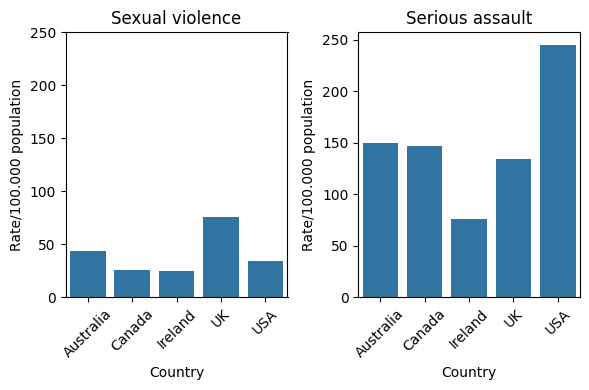

In [62]:
plt.figure(figsize=(6, 4))

plt.subplot(1, 2, 1)  # 1 row, 2 columns, plot 1
sns.barplot(data=df_violence_final, x = "Country", y = "Sexual violence")
plt.ylabel("Rate/100.000 population")
plt.title("Sexual violence")
plt.xticks(rotation=45)
plt.ylim(0,250)


# Plot the second barplot
plt.subplot(1, 2, 2)  # 1 row, 2 columns, plot 2

sns.barplot(data=df_violence_final, x = "Country", y = "Serious assault")
plt.ylabel("Rate/100.000 population")
plt.title("Serious assault")
plt.xticks(rotation=45)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

## df_violence_final

- 2 final features related to two broad types of crime:

1) **Sexual violence**
2) **Serious assault**

- The values represent the mean values of the **rate per 100.000 population**. for last 10 years from 2018.

**Insights**:

- Serious assault rates are higher than sexual violence crimes
- While sexual violence is highest in UK, USA shows a highest rate of serius assault
- Ireland has the lowest values for both crimes

# Datasets combination

3 final datasets: 

     df_drugs_new -> ../data/df_drugs_cleaned.csv
     df_wdi_final -> ../data/df_wdi_cleaned.csv
     df_violence_final -> ../data/df_violence_cleaned.csv

In [63]:
df = pd.merge(df_drugs_new, df_wdi_final, on='Country', how='left')
merged_df = pd.merge(df, df_violence_final, on='Country', how='left')

In [64]:
merged_df.head()

,Age,Gender,Education,Country,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,...,Poverty,unemployment_adv_edu_f,unemployment_adv_edu_m,unemployment_bas_edu_f,unemployment_bas_edu_m,unemployment_int_edu_f,unemployment_int_edu_m,unemployment_tot,Serious assault,Sexual violence
0,2,1,1,UK,39.0,36.0,42.0,37.0,-0.00665,-0.21712,...,11.881818,3.315364,3.527909,9.912545,11.742455,6.503273,6.948545,6.266727,134.043352,75.642036
1,1,-1,2,UK,29.0,52.0,55.0,48.0,-0.14277,-0.71126,...,11.881818,3.315364,3.527909,9.912545,11.742455,6.503273,6.948545,6.266727,134.043352,75.642036
2,2,-1,1,UK,31.0,45.0,40.0,32.0,-1.01450,-1.37983,...,11.881818,3.315364,3.527909,9.912545,11.742455,6.503273,6.948545,6.266727,134.043352,75.642036
3,0,1,2,UK,34.0,34.0,46.0,47.0,0.58489,-1.37983,...,11.881818,3.315364,3.527909,9.912545,11.742455,6.503273,6.948545,6.266727,134.043352,75.642036
4,2,1,2,UK,43.0,28.0,43.0,41.0,1.30612,-0.21712,...,11.881818,3.315364,3.527909,9.912545,11.742455,6.503273,6.948545,6.266727,134.043352,75.642036


- **Selecting the correspondent unemployment rate for each individual based on their level of education and gender**
- Creating a new column in merged_df called "Unemployment_Rate" having as rows the values specific for each individual based on their level of education and gender.

In [265]:
def select_unemployment_rate(row):
    
    if row["Education"] == 0:
        if row["Gender"] == -1:  # male = -1
            return row["unemployment_bas_edu_m"]
        elif row["Gender"] == 1:  # female = 1
            return row["unemployment_bas_edu_f"]
    elif row["Education"] == 1:
        if row["Gender"] == -1:
            return row["unemployment_int_edu_m"]
        elif row["Gender"] == 1:
            return row["unemployment_int_edu_f"]
    elif row["Education"] == 2:
        if row["Gender"] == -1:
            return row["unemployment_adv_edu_m"]
        elif row["Gender"] == 1:
            return row["unemployment_adv_edu_f"]
    else:
        return None
    
# Creating a new column containing the unemployment rates specific for the individuals' level of education and gender

merged_df["Unemployment_Rate"] = merged_df.apply(select_unemployment_rate, axis = 1)

# Deleting the original columns

merged_df.drop(columns = ["unemployment_adv_edu_f","unemployment_adv_edu_m", "unemployment_bas_edu_f",
                          "unemployment_bas_edu_m", "unemployment_int_edu_f",
                          "unemployment_int_edu_m", "unemployment_tot"], axis = 1, inplace= True)

In [267]:
# Saving final dataset

merged_df.to_csv("../data/df_tot.csv", index = False)